# BREAST CANCER DIAGNOSIS

Imports

In [1]:
# Initial imports
from src.data_load import *
from src.preprocessing import *
from src.train_models import *
from src.balance import *

# Machine Learning models
from models.LR_model import *
from models.DT_model import *
from models.SVM_model import *

from models.KNN_model import *
from models.NN_model import *

# Visualize
from src.auc_roc_curve import *
from src.plots import *

## Data Preprocessing and Exploration

Data loading and preview

In [2]:
df = load_data("data_original.csv")

In [3]:
df.head(10)

Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   
5                8                       10                        10   
6                1                        1                         1   
7                2                        1                         2   
8                2                        1                         1   
9                4                        2                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   
5                  8                            7         10.0   
6                  1                            2         10.0   
7                  1                            2          1.0   
8                  1                            2          1.0   
9                  1                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2                3                1        1      2  
3                3                7        1      2  
4                3                1        1      2  
5                9                7        1      4  
6                3                1        1      2  
7                3                1        1      2  
8                1                1        5      2  
9                2                1        1      2

In [4]:
show_shape(df)

Rows: 699
Columns: 10


In [5]:
list_cols = df.columns.tolist()
for col in list_cols:
    print(col)

Clump_thickness
Uniformity_of_cell_size
Uniformity_of_cell_shape
Marginal_adhesion
Single_epithelial_cell_size
Bare_nuclei
Bland_chromatin
Normal_nucleoli
Mitoses
Class


### Data Cleanup Process

Balancing dataset

In [6]:
df_balanced = random_over_sampling(df, "Class")

In [7]:
show_shape(df_balanced)

Rows: 916
Columns: 10


Dropping rows with missing values

In [8]:
df_rows_dropped = drop_rows_from_col(df_balanced,"Bare_nuclei")

In [9]:
show_shape(df_rows_dropped)

Rows: 898
Columns: 10


Converting "Class" values to binary

In [10]:
df_target_feature_mapped = mapping_target_feature(df_rows_dropped,"Class",2,4,0,1)

In [11]:
df_target_feature_mapped.head(10)

Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                3                        1                         1   
1                8                        2                         4   
2                5                        1                         1   
3                3                        1                         1   
4                1                        1                         1   
5                8                        7                         8   
6               10                       10                        10   
7                8                       10                         5   
8                7                        5                         6   
9                4                        1                         1   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                  1                            2          1.0   
1                  1                            5          1.0   
2                  1                            2          1.0   
3                  1                            2          1.0   
4                  1                            2          1.0   
5                  5                            5         10.0   
6                 10                            3         10.0   
7                  3                            8          4.0   
8                 10                            5         10.0   
9                  3                            2          1.0   

   Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0                2                1        1      0  
1                5                4        4      1  
2                3                1        1      0  
3                2                1        1      0  
4                2                1        1      0  
5                9               10        1      1  
6               10                6        1      1  
7                4               10        3      1  
8                7                9        4      1  
9                3                1        1      0

Updating data types

In [12]:
for col in df_target_feature_mapped.columns:
    print(col, "->", df_target_feature_mapped[col].dtype)

Clump_thickness -> int64
Uniformity_of_cell_size -> int64
Uniformity_of_cell_shape -> int64
Marginal_adhesion -> int64
Single_epithelial_cell_size -> int64
Bare_nuclei -> float64
Bland_chromatin -> int64
Normal_nucleoli -> int64
Mitoses -> int64
Class -> int64


In [13]:
for col in df_target_feature_mapped.columns.tolist():
    df_target_feature_mapped[col] = df_target_feature_mapped[col].astype(int)

Removing "id" column

No column "id", not removal

## Data Exploration and Visualization

Parallel Coordinate Plot

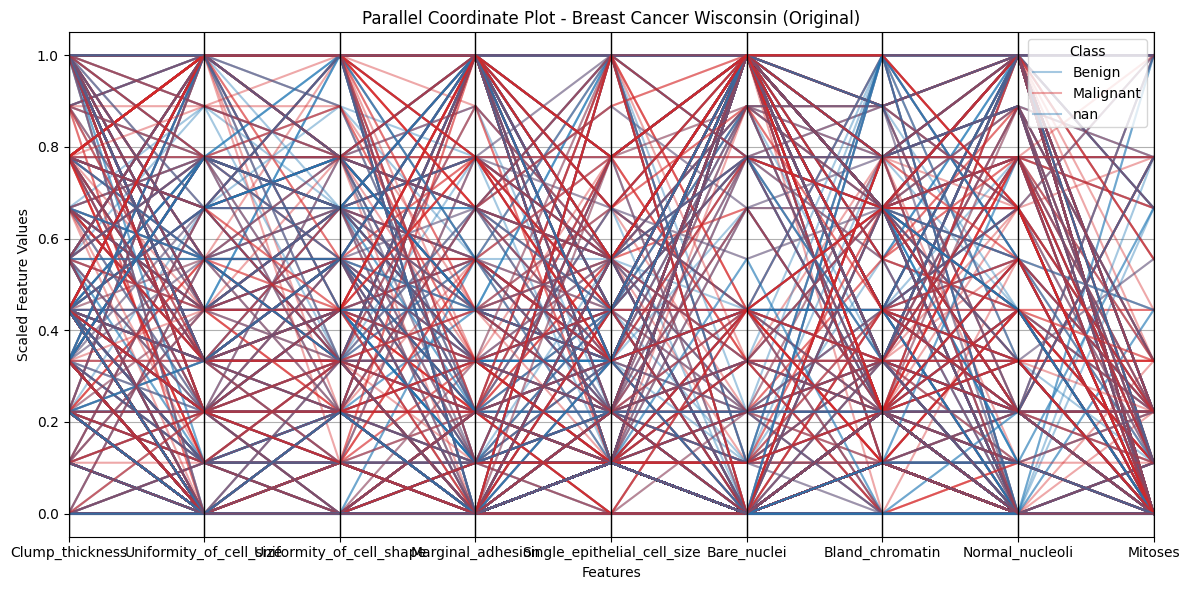

In [14]:
plot_parallel(df_target_feature_mapped, "Class")

Distribution of Each Feature for Both Classes

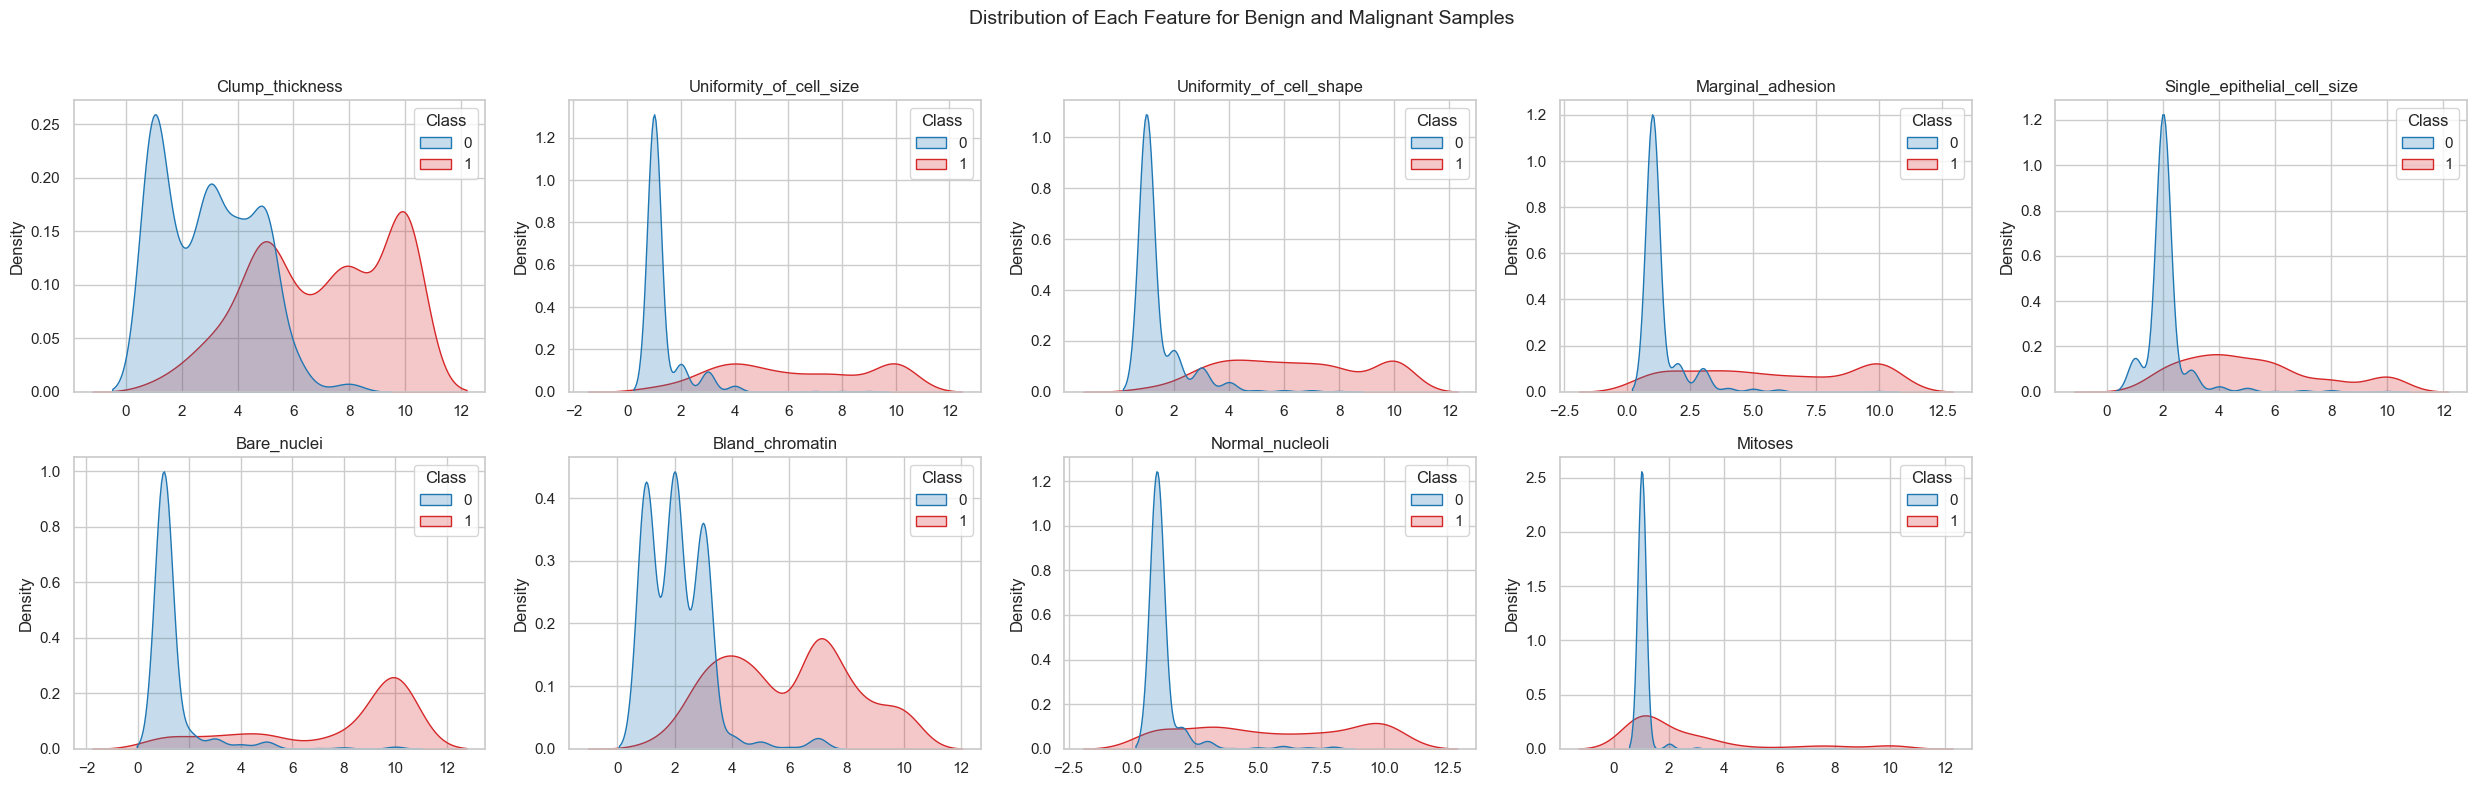

In [15]:
plot_distribution(df_target_feature_mapped, "Class")

## Machine Learning Models (LR, DT, SVM)

Training Models

In [16]:
X_train, X_test, Y_train, Y_test = train_model(df_target_feature_mapped,"Class",0.2)

Logistic Regression

In [17]:
result_lr, Y_probs_lr = lr_model(X_train,X_test,Y_train,Y_test,500)

Logistic Regression ROC-AUC: 0.9932


Support Vector Machines

In [18]:
result_svm, Y_pred_svm = svm_model(X_train,X_test,Y_train,Y_test,["linear","poly","rbf","sigmoid"],[0.1,0.5,1,3,9,100],[0.1,1,10])

Accuracy score for C=0.1, kernel=linear and gamma=0.1: 0.9833
Accuracy score for C=0.1, kernel=linear and gamma=1: 0.9833
Accuracy score for C=0.1, kernel=linear and gamma=10: 0.9833
Accuracy score for C=0.5, kernel=linear and gamma=0.1: 0.9833
Accuracy score for C=0.5, kernel=linear and gamma=1: 0.9833
Accuracy score for C=0.5, kernel=linear and gamma=10: 0.9833
Accuracy score for C=1, kernel=linear and gamma=0.1: 0.9833
Accuracy score for C=1, kernel=linear and gamma=1: 0.9833
Accuracy score for C=1, kernel=linear and gamma=10: 0.9833
Accuracy score for C=3, kernel=linear and gamma=0.1: 0.9833
Accuracy score for C=3, kernel=linear and gamma=1: 0.9833
Accuracy score for C=3, kernel=linear and gamma=10: 0.9833
Accuracy score for C=9, kernel=linear and gamma=0.1: 0.9833
Accuracy score for C=9, kernel=linear and gamma=1: 0.9833
Accuracy score for C=9, kernel=linear and gamma=10: 0.9833
Accuracy score for C=100, kernel=linear and gamma=0.1: 0.9833
Accuracy score for C=100, kernel=linear a

Decision Trees

In [19]:
result_dt, Y_pred_dt = dt_model(X_train,X_test,Y_train,Y_test,[1, 2, 5, 10, 15, 20, 30, 50, 100],[2, 5, 10, 15, 20, 30, 50],[1, 2, 5, 10, 15, 20, 30, 50])

max_depth=1, min_samples_split=2, min_samples_leaf=1 -> CV accuracy=0.9192
max_depth=1, min_samples_split=2, min_samples_leaf=2 -> CV accuracy=0.9192
max_depth=1, min_samples_split=2, min_samples_leaf=5 -> CV accuracy=0.9192
max_depth=1, min_samples_split=2, min_samples_leaf=10 -> CV accuracy=0.9192
max_depth=1, min_samples_split=2, min_samples_leaf=15 -> CV accuracy=0.9192
max_depth=1, min_samples_split=2, min_samples_leaf=20 -> CV accuracy=0.9192
max_depth=1, min_samples_split=2, min_samples_leaf=30 -> CV accuracy=0.9192
max_depth=1, min_samples_split=2, min_samples_leaf=50 -> CV accuracy=0.9192
max_depth=1, min_samples_split=5, min_samples_leaf=1 -> CV accuracy=0.9192
max_depth=1, min_samples_split=5, min_samples_leaf=2 -> CV accuracy=0.9192
max_depth=1, min_samples_split=5, min_samples_leaf=5 -> CV accuracy=0.9192
max_depth=1, min_samples_split=5, min_samples_leaf=10 -> CV accuracy=0.9192
max_depth=1, min_samples_split=5, min_samples_leaf=15 -> CV accuracy=0.9192
max_depth=1, min_s

Summary of best results

In [20]:
print(f"Logistic Regression: {result_lr:.4f}")
print(f"Support Vector Machines: {result_svm:.4f}")
print(f"Decision Tree: {result_dt:.4f}")

Logistic Regression: 0.9932
Support Vector Machines: 0.9833
Decision Tree: 0.9556


---

## Methodology Test (different dataset)

Data loading and preview

In [21]:
df2 = load_data("data_diagnosis.csv")

In [22]:
df2.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

In [23]:
show_shape(df2)

Rows: 569
Columns: 33


In [24]:
list_cols = df2.columns.tolist()
for col in list_cols:
    print(col)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32


### Data Cleanup Process

Balancing dataset

In [25]:
df_balanced2 = random_over_sampling(df2, "diagnosis")

In [26]:
show_shape(df_balanced2)

Rows: 714
Columns: 33


Dropping rows with missing values

In [27]:
cols_missing_values = find_missing_values(df_balanced2)

Unnamed: 32
714


Not dropping rows as it would be the whole data

Converting "Diagnosis" values to binary

In [28]:
df_target_feature_mapped2 = mapping_target_feature(df_balanced2, "diagnosis", "B", "M", 0, 1)

In [29]:
df_target_feature_mapped2.head(10)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   88411702          0        13.75         23.77           88.54      590.0   
1   91903902          0        13.68         16.33           87.76      575.5   
2     863031          0        11.64         18.33           75.17      412.5   
3     912600          0        15.73         11.28          102.80      747.2   
4    8810955          1        14.19         23.81           92.87      610.7   
5     887549          1        20.31         27.06          132.90     1288.0   
6   86973702          0        14.44         15.18           93.97      640.1   
7     916799          1        18.31         20.58          120.80     1052.0   
8    8712291          0        14.97         19.76           95.50      690.2   
9  881094802          1        17.42         25.56          114.50      948.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08043           0.06807         0.04697              0.02344   
1          0.09277           0.07255         0.01752              0.01880   
2          0.11420           0.10170         0.07070              0.03485   
3          0.10430           0.12990         0.11910              0.06211   
4          0.09463           0.13060         0.11150              0.06462   
5          0.10000           0.10880         0.15190              0.09333   
6          0.09970           0.10210         0.08487              0.05532   
7          0.10680           0.12480         0.15690              0.09451   
8          0.08421           0.05352         0.01947              0.01939   
9          0.10060           0.11460         0.16820              0.06597   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          26.34            98.00       706.0           0.09368   
1  ...          20.20           101.60       773.4           0.12640   
2  ...          29.26            85.51       521.7           0.16880   
3  ...          14.20           112.50       854.3           0.15410   
4  ...          34.85           115.00       811.3           0.15590   
5  ...          39.16           162.30      1844.0           0.15220   
6  ...          19.85           108.60       766.9           0.13160   
7  ...          26.20           142.20      1493.0           0.14920   
8  ...          25.82           102.30       782.1           0.10450   
9  ...          28.07           120.40      1021.0           0.12430   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0            0.14420           0.1359               0.06106          0.2663   
1            0.15640           0.1206               0.08704          0.2806   
2            0.26600           0.2873               0.12180          0.2806   
3            0.29790           0.4004               0.14520          0.2557   
4            0.40590           0.3744               0.17720          0.4724   
5            0.29450           0.3788               0.16970          0.3151   
6            0.27350           0.3103               0.15990          0.2691   
7            0.25360           0.3759               0.15100          0.3074   
8            0.09995           0.0775               0.05754          0.2646   
9            0.17930           0.2803               0.10990          0.1603   

   fractal_dimension_worst  Unnamed: 32  
0                  0.06321          NaN  
1                  0.07782          NaN  
2                  0.09097          NaN  
3                  0.08181          NaN  
4                  0.10260          NaN  
5                  0.07999          NaN  
6                  0.07683          NaN  
7                  0.07863          NaN  
8                  0.06085          NaN  
9                  0.06818          NaN  

[10 rows x 33 columns]

Updating data types

In [30]:
for col in df_target_feature_mapped2.columns:
    print(col, "->", df_target_feature_mapped2[col].dtype)

id -> int64
diagnosis -> int64
radius_mean -> float64
texture_mean -> float64
perimeter_mean -> float64
area_mean -> float64
smoothness_mean -> float64
compactness_mean -> float64
concavity_mean -> float64
concave points_mean -> float64
symmetry_mean -> float64
fractal_dimension_mean -> float64
radius_se -> float64
texture_se -> float64
perimeter_se -> float64
area_se -> float64
smoothness_se -> float64
compactness_se -> float64
concavity_se -> float64
concave points_se -> float64
symmetry_se -> float64
fractal_dimension_se -> float64
radius_worst -> float64
texture_worst -> float64
perimeter_worst -> float64
area_worst -> float64
smoothness_worst -> float64
compactness_worst -> float64
concavity_worst -> float64
concave points_worst -> float64
symmetry_worst -> float64
fractal_dimension_worst -> float64
Unnamed: 32 -> float64


In [31]:
for col in df_target_feature_mapped.columns.tolist():
    df_target_feature_mapped[col] = df_target_feature_mapped[col].astype(float)

Removing unnecessary columns

In [32]:
df_no_unnecessary2 = drop_unnecessary_columns(df_target_feature_mapped2, "id", "Unnamed: 32")

In [33]:
show_shape(df_no_unnecessary2)

Rows: 714
Columns: 31


## Data Exploration and Visualization

Parallel Coordinate Plot

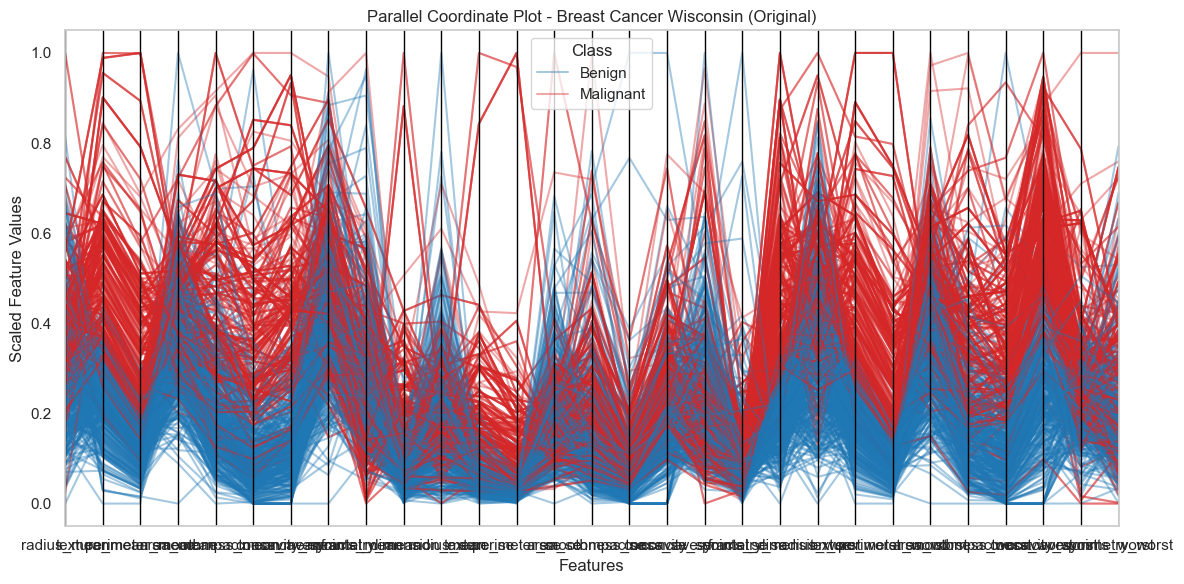

In [34]:
plot_parallel(df_no_unnecessary2, "diagnosis")

Distribution of Each Feature for Both Classes

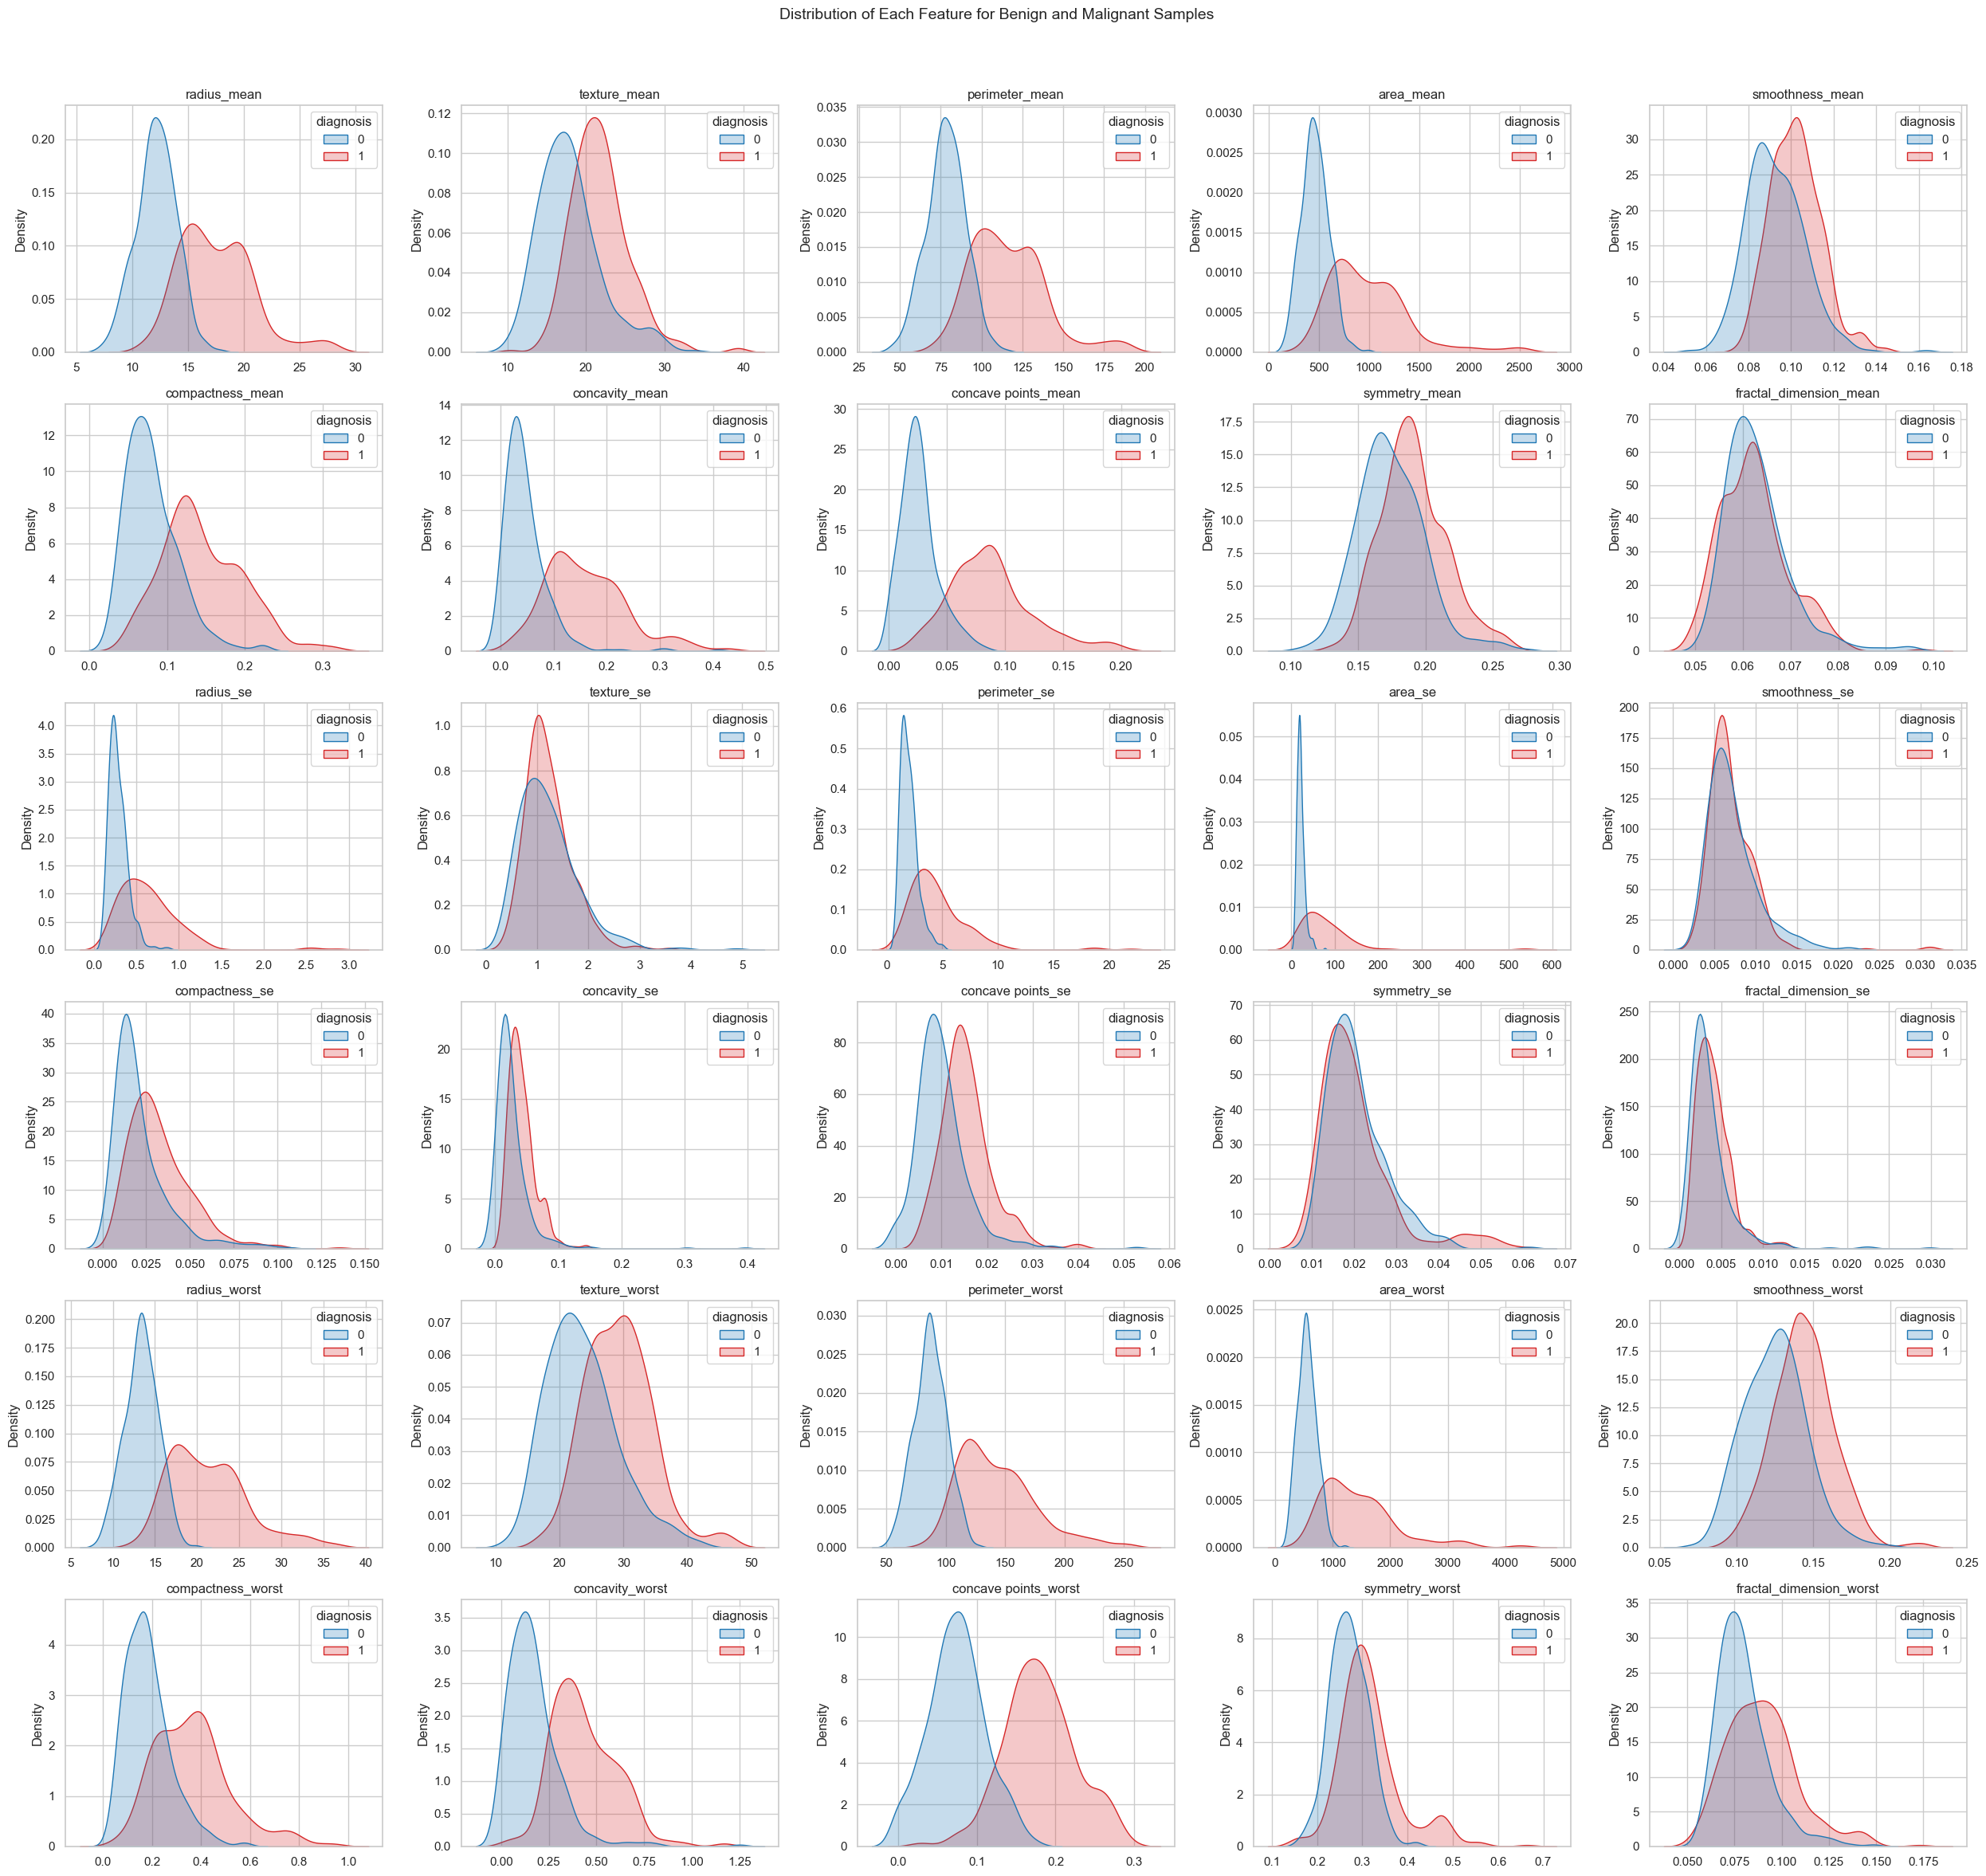

In [35]:
plot_distribution(df_no_unnecessary2, "diagnosis")

## Machine Learning Models (LR, DT, SVM)

Correlation

In [36]:
num_cols = find_numerical_features(df_no_unnecessary2)

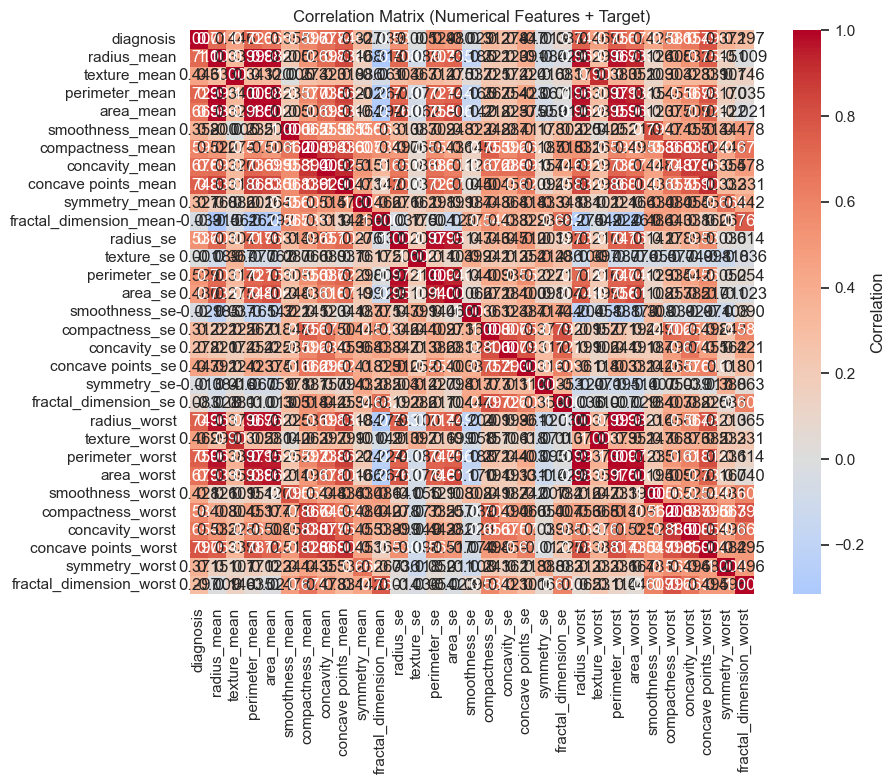

Top 10 features most correlated with diagnosis:
concave points_worst: 0.7900
perimeter_worst: 0.7501
concave points_mean: 0.7483
radius_worst: 0.7431
perimeter_mean: 0.7226
radius_mean: 0.7113
concavity_mean: 0.6783
area_worst: 0.6727
area_mean: 0.6654
concavity_worst: 0.6542


In [37]:
corr_features_10 = plot_correlation_matrix(df_no_unnecessary2, num_cols, "diagnosis", 10)

In [38]:
df_reduced = keep_top_features(df_no_unnecessary2, corr_features_10, "diagnosis")

In [39]:
show_shape(df_reduced)

Rows: 714
Columns: 11


Training Models

In [40]:
X_train2, X_test2, Y_train2, Y_test2 = train_model(df_reduced, "diagnosis", 0.2)

Logistic Regression

In [41]:
result_lr2, Y_probs_lr2 = lr_model(X_train2, X_test2, Y_train2, Y_test2,10_000)

Logistic Regression ROC-AUC: 0.9752


Support Vector Machines

In [42]:
# result_svm2, Y_pred_svm2 = svm_model(X_train2, X_test2, Y_train2, Y_test2, ["linear", "poly", "rbf", "sigmoid"], [0.1, 0.5, 1, 3, 9, 100], [0.1, 1, 10])

Decision Trees

In [43]:
result_dt2, Y_pred_dt2 = dt_model(X_train2, X_test2, Y_train2, Y_test2, [1, 2, 5, 10, 15, 20, 30, 50, 100], [2, 5, 10, 15, 20, 30, 50], [1, 2, 5, 10, 15, 20, 30, 50])

max_depth=1, min_samples_split=2, min_samples_leaf=1 -> CV accuracy=0.9107
max_depth=1, min_samples_split=2, min_samples_leaf=2 -> CV accuracy=0.9107
max_depth=1, min_samples_split=2, min_samples_leaf=5 -> CV accuracy=0.9107
max_depth=1, min_samples_split=2, min_samples_leaf=10 -> CV accuracy=0.9107
max_depth=1, min_samples_split=2, min_samples_leaf=15 -> CV accuracy=0.9107
max_depth=1, min_samples_split=2, min_samples_leaf=20 -> CV accuracy=0.9107
max_depth=1, min_samples_split=2, min_samples_leaf=30 -> CV accuracy=0.9107
max_depth=1, min_samples_split=2, min_samples_leaf=50 -> CV accuracy=0.9107
max_depth=1, min_samples_split=5, min_samples_leaf=1 -> CV accuracy=0.9107
max_depth=1, min_samples_split=5, min_samples_leaf=2 -> CV accuracy=0.9107
max_depth=1, min_samples_split=5, min_samples_leaf=5 -> CV accuracy=0.9107
max_depth=1, min_samples_split=5, min_samples_leaf=10 -> CV accuracy=0.9107
max_depth=1, min_samples_split=5, min_samples_leaf=15 -> CV accuracy=0.9107
max_depth=1, min_s

Summary of best results

In [44]:
print(f"Logistic Regression: {result_lr2:.4f}")
print(f"Support Vector Machines: not able to get complete results")
print(f"Decision Tree: {result_dt2:.4f}")

Logistic Regression: 0.9752
Support Vector Machines: not able to get complete results
Decision Tree: 0.9301


---

## Results

Research paper's methodology was applied to a similar dataset, and it worked just fine. Only that for computation purposes, it was necessary to make the dataframe smaller by keeping the 10 most correlated features. Even with the reduced dataframe, computation power wasn't enough to run all the SVM parameters (SVM left out).

---

## Try different parameters (new approach)

## New predictive models (KNN, NN)